In [496]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
import math
import warnings
warnings.filterwarnings("ignore")

In [497]:
FILE_NUMBER = 4
FOLDER_NUMBER = 7554

In [498]:
def load_image_data():
    file_name = './data/kids drawing-train/' + str(FOLDER_NUMBER) + '/SimpleTest/' + str(FILE_NUMBER)
    
    if not os.path.isfile(file_name + '.png'):
        print("Image not exits")
        return None
    
    if not os.path.isfile(file_name + '.csv'):
        print("Data not exits")
        return None
    
    return (pd.read_csv(file_name + '.csv'), file_name + '.png') 

In [499]:
(df, img) = load_image_data()
df.head(185)

,X,Y,Pressure,TiltX,TiltY,Time
0,847.805058320822,696.243908,0.058579,-4762.0,723.0,00:07.4715108
1,848.068368171844,696.085922,0.061509,-4762.0,723.0,00:07.4871337
2,848.437001963275,695.769950,0.065415,-4762.0,723.0,00:07.5028896
3,848.437001963275,695.769950,0.086412,-4762.0,723.0,00:07.5183749
4,848.437001963275,695.769950,0.159655,-4762.0,723.0,00:07.5339944
...,...,...,...,...,...,...
180,700.562189629287,593.184432,0.760983,-4462.0,1444.0,00:09.5801703
181,700.930823420718,592.868461,0.760983,-4462.0,1444.0,00:09.5957937
182,702.089386765215,591.604573,0.760983,-4462.0,1444.0,00:09.5957937
183,702.510682526851,591.130616,0.760983,-4462.0,1444.0,00:09.6114168


In [500]:
def col_X_ToNum(data_as_str, defualt_value):
    if not data_as_str:
        return defualt_value
    
    if pd.isna(data_as_str):
        return defualt_value
    
    if type(data_as_str) == float:
        return data_as_str
    
    if re.search("^[a-zA-Z]", data_as_str) is not None:
        return defualt_value
    return float(data_as_str)


In [501]:
def col_Y_ToNum(data_as_str, defualt_value):
    if not data_as_str:
        return defualt_value
        
    if pd.isna(data_as_str):
        return defualt_value
    
    if type(data_as_str) == float:
        return data_as_str
        
    return float(data_as_str)



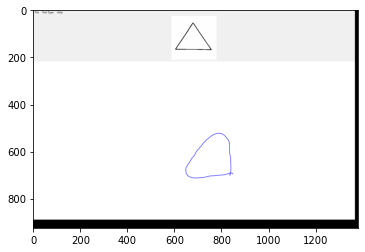

In [502]:
img1 = mpimg.imread('./data/kids drawing-train/' + str(FOLDER_NUMBER) + '/SimpleTest/' + str(FILE_NUMBER)+".png")
plt.imshow(img1)

In [503]:
def to_number(date_as_str, defualt_value):
    if not date_as_str:
        return defualt_value

    if pd.isna(date_as_str):
        return defualt_value
    
    
    if type(date_as_str) == float:
        return date_as_str
    
    (p1, p2) = date_as_str.split(':')
    p1 = float(p1)
    p2 = float(p2)
    return p1 * 60 + p2

In [504]:
def changing_columns_type(df):
    df["Time"] = df[" Time"]
    df["Time"][0] = to_number(df["Time"][0], 0)
    df["Y"] = df[" Y"]
    df["Pressure"] = df[" Pressure"]
    df["Y"][0] = col_Y_ToNum(df["Y"][0], 0)
    df["Pressure"][0] = col_Y_ToNum(df["Pressure"][0], 0)
    df["X"][0] = col_X_ToNum(df["X"][0], 0)

    flag_first = True
    for index in df.index:
        if flag_first:
            flag_first = False
        else:
            df["Time"][index] = to_number(df["Time"][index], df["Time"][index - 1])
            df["Y"][index] = col_Y_ToNum(df["Y"][index], df["Y"][index - 1])
            df["Pressure"][index] = col_Y_ToNum(df["Pressure"][index], df["Pressure"][index - 1])
            df["X"][index] = col_X_ToNum(df["X"][index], df["X"][index - 1])

    df["X"]

In [505]:
changing_columns_type(df)

In [506]:
df["Y"]

0      696.243908
1      696.085922
2      695.769950
3      695.769950
4      695.769950
          ...    
406    702.510683
407    701.931401
408    696.191246
409    696.191246
410    696.191246
Name: Y, Length: 411, dtype: float64

In [507]:
df["Time"]

0       7.471511
1       7.487134
2        7.50289
3       7.518375
4       7.533994
         ...    
406    12.039515
407    12.055138
408    12.055138
409    12.055138
410    12.055138
Name: Time, Length: 411, dtype: object

In [508]:
df["Pressure"]

0      0.058579
1      0.061509
2      0.065415
3      0.086412
4      0.159655
         ...   
406    0.708492
407    0.628656
408    0.293935
409    0.293935
410    0.293935
Name: Pressure, Length: 411, dtype: float64

## Q.1.

Counting lines

In [509]:
def calculate_slope(df, up_i):
    if (df['X'][up_i]-df['X'][0]) == 0:
        slp = 0
    else:
        slp = (df['Y'][up_i]-df['Y'][0])/(df['X'][up_i]-df['X'][0])
    return slp

In [510]:
UP_I = 5

def lines_cords(df):
    slp = calculate_slope(df, UP_I)
    lines = []
    prev = 0
    i = 0
    current_slp = slp
    while (i+UP_I)<len(df):
        if (df['Y'][i]!= df['Y'][i+UP_I]) & (df['X'][i]!= df['X'][i+UP_I]):
            current_slp = (df['Y'][i+UP_I]-df['Y'][i])/(df['X'][i+UP_I]-df['X'][i])    
        if (current_slp<=slp+0.5) & (current_slp>=slp-0.5) :
            slp = current_slp
        else:
            if i-prev>60:
                lines.append({ 'start' : prev, 'end' : i })
                prev = i
        if i + UP_I + 1== len(df):
            lines.append({ 'start' : prev, 'end' : i })
        slp = current_slp
        i+=1
    
    return lines

In [511]:
lines = lines_cords(df)
print("number of lines: ",len(lines))

number of lines:  4


## Q.2.

Compute the length of each line and the avarage pressure applied by clicking on each line

In [512]:
def avg_pressure(df, start, end):
    sum_pressures = 0
    for j in range(start, end):
        sum_pressures += float(df[" Pressure"][j])
    return sum_pressures/(end - start)


In [513]:
def Lengths_of_lines(df, lines):
    for i in lines:
        start = i['start']
        end = i['end']
        avg_pressure_data = avg_pressure(df, start, end)
        dist = math.dist([df['X'][start] , df['Y'][start]],[df['X'][end], df['Y'][end]])
        print("Length is " , dist , ", Avarage pressure is " , avg_pressure_data )
        print('-------------------')


In [514]:
Lengths_of_lines(df, lines)

Length is  195.85711710408103 , Avarage pressure is  0.47441884274910956
-------------------
Length is  227.6915844705855 , Avarage pressure is  0.7412667758002573
-------------------
Length is  107.79534834110372 , Avarage pressure is  0.7567961929274387
-------------------
Length is  40.922010590429664 , Avarage pressure is  0.7433717343542312
-------------------


## Q.3.

Count how many hand lifts were in the drawing

<AxesSubplot:>

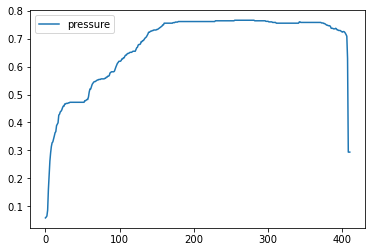

In [515]:
pd.DataFrame({ 'pressure':df['Pressure']}).plot()

In [516]:
MIN_PRESSURE = 0.16
def FindPressure(df):
    lifts = 0
    prev_lift = False
    i = 2
    while (i)<len(df):
        if (df['Pressure'][i] <= MIN_PRESSURE) :
            prev_lift = True
        else:
            if prev_lift:
                lifts+=1
                prev_lift = False
        i+=1
    
    return lifts

In [517]:
print("There are ",FindPressure(df)," hands lifts")

There are  1  hands lifts


## Q.4.

(bonus)
4. לבדוק האם הצורה פתוחה או סגורה )בונוס - רק לגבי צורות מסוימות(

In [518]:
def IsOpen(df):
    eps = 10
    for i in range(len(df)):
        start_x = df["X"][i]
        start_y = df["Y"][i]
        j=i
        while (j<len(df)):
            curr_x = df["X"][j]
            curr_y = df["Y"][j]
            if ((math.dist([start_x , start_y] , [curr_x, curr_y]) < eps) & 
                (df["Time"][j] - df["Time"][i] > 0.8)):
                print("The shape is closed")
                return
            j+=1
    print("The shape is opened")


In [519]:
IsOpen(df)

The shape is closed
